In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score

In [2]:
df = pd.read_csv('mushroom.csv')

In [3]:
df

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,863,sunken,scaly,brown,yes,foul,attached,crowded,narrow,chocolate,...,partial,orange,one,flaring,purple,abundant,leaves,poisonous,5.877891,17.464145
1996,1160,sunken,scaly,purple,yes,musty,attached,distant,narrow,red,...,partial,white,one,zone,yellow,numerous,waste,poisonous,6.500840,13.501957
1997,265,convex,grooves,green,yes,fishy,notched,close,narrow,pink,...,partial,brown,two,evanescent,yellow,abundant,woods,poisonous,13.558064,11.270020
1998,411,bell,smooth,white,no,pungent,free,close,narrow,orange,...,universal,yellow,one,cobwebby,brown,solitary,woods,poisonous,11.092703,8.423199


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2000 non-null   int64  
 1   cap_shape                 2000 non-null   object 
 2   cap_surface               2000 non-null   object 
 3   cap_color                 2000 non-null   object 
 4   bruises                   2000 non-null   object 
 5   odor                      2000 non-null   object 
 6   gill_attachment           2000 non-null   object 
 7   gill_spacing              2000 non-null   object 
 8   gill_size                 2000 non-null   object 
 9   gill_color                2000 non-null   object 
 10  stalk_shape               2000 non-null   object 
 11  stalk_root                2000 non-null   object 
 12  stalk_surface_above_ring  2000 non-null   object 
 13  stalk_surface_below_ring  2000 non-null   object 
 14  stalk_co

In [5]:
df.describe()

,Unnamed: 0,stalk_height,cap_diameter
count,2000.000000,2000.000000,2000.000000
mean,624.974000,8.449118,12.314345
std,375.091938,3.697217,7.048845
min,0.000000,2.000000,1.000000
25%,290.000000,5.291009,5.723521
50%,607.000000,8.318596,12.124902
75%,957.250000,11.781272,18.698605
max,1279.000000,15.095066,25.000054


In [6]:
df.isnull().sum()

Unnamed: 0                  0
cap_shape                   0
cap_surface                 0
cap_color                   0
bruises                     0
odor                        0
gill_attachment             0
gill_spacing                0
gill_size                   0
gill_color                  0
stalk_shape                 0
stalk_root                  0
stalk_surface_above_ring    0
stalk_surface_below_ring    0
stalk_color_above_ring      0
stalk_color_below_ring      0
veil_type                   0
veil_color                  0
ring_number                 0
ring_type                   0
spore_print_color           0
population                  0
habitat                     0
class                       0
stalk_height                0
cap_diameter                0
dtype: int64

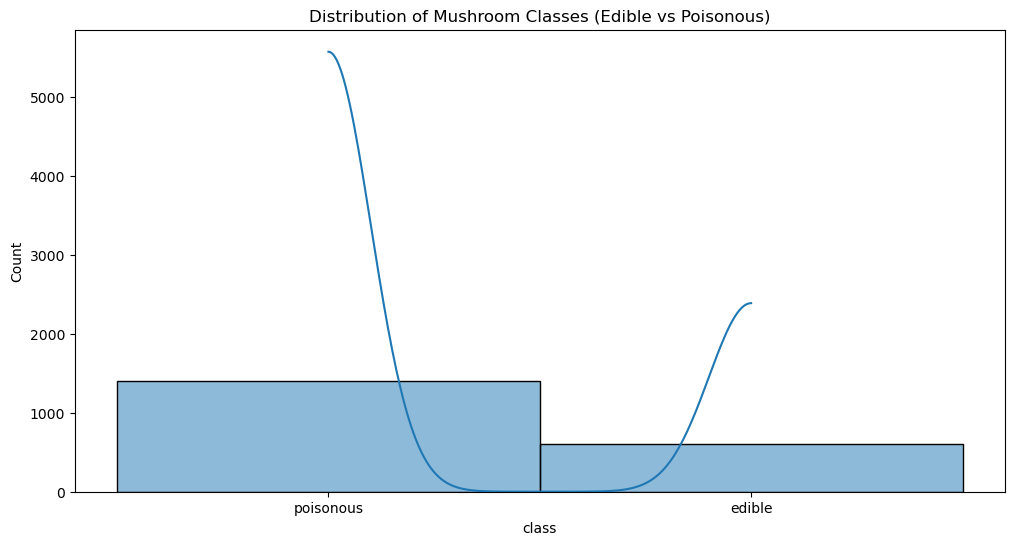

In [7]:
plt.figure(figsize=(12, 6))
sns.histplot(df["class"], kde=True)
plt.title("Distribution of Mushroom Classes (Edible vs Poisonous)")
plt.show()

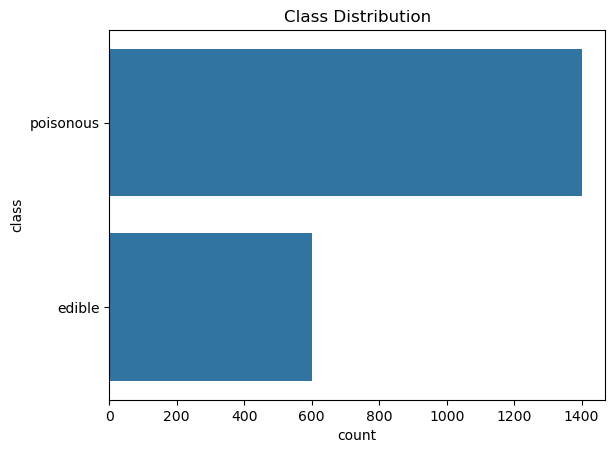

In [8]:
sns.countplot(df['class'])
plt.title('Class Distribution')
plt.show()

In [9]:
label_encoder = LabelEncoder()
df["class"] = label_encoder.fit_transform(df["class"])  # Encode target variable


In [10]:
df_encoded = pd.get_dummies(df, drop_first=True)

In [11]:
df_encoded

,Unnamed: 0,class,stalk_height,cap_diameter,cap_shape_conical,cap_shape_convex,cap_shape_flat,cap_shape_sunken,cap_surface_grooves,cap_surface_scaly,...,population_numerous,population_scattered,population_several,population_solitary,habitat_leaves,habitat_meadows,habitat_paths,habitat_urban,habitat_waste,habitat_woods
0,1167,1,14.276173,5.054983,False,False,False,True,False,True,...,False,False,False,False,False,False,False,False,True,False
1,1037,0,3.952715,19.068319,False,False,False,True,False,False,...,True,False,False,False,False,False,False,False,True,False
2,309,1,9.054265,7.205884,False,False,True,False,True,False,...,False,False,False,False,False,False,False,False,True,False
3,282,1,5.226499,20.932692,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
4,820,1,14.037532,12.545245,False,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,863,1,5.877891,17.464145,False,False,False,True,False,True,...,False,False,False,False,True,False,False,False,False,False
1996,1160,1,6.500840,13.501957,False,False,False,True,False,True,...,True,False,False,False,False,False,False,False,True,False
1997,265,1,13.558064,11.270020,False,True,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True
1998,411,1,11.092703,8.423199,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True


In [12]:
X = df_encoded.drop("class", axis=1)
y = df_encoded["class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

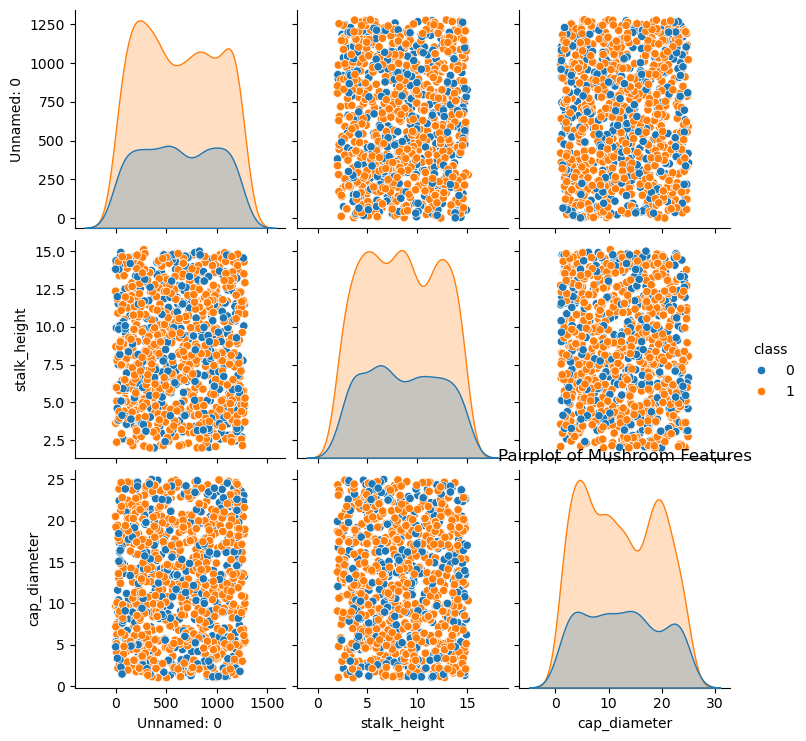

In [13]:
sns.pairplot(df, hue="class")
plt.title("Pairplot of Mushroom Features")
plt.show()

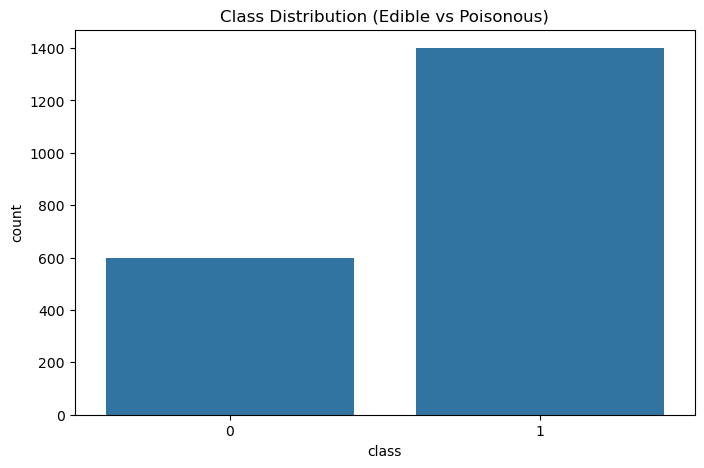

In [14]:
plt.figure(figsize=(8, 5))
sns.countplot(x="class", data=df)
plt.title("Class Distribution (Edible vs Poisonous)")
plt.show()

In [15]:
svm_classifier = SVC(kernel="linear", random_state=42)

In [16]:
svm_classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [17]:
y_pred = svm_classifier.predict(X_test)

In [18]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


In [19]:
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

Accuracy: 0.7033333333333334
Precision: 0.7198515769944341
Recall: 0.9349397590361446
F1-Score: 0.8134171907756813


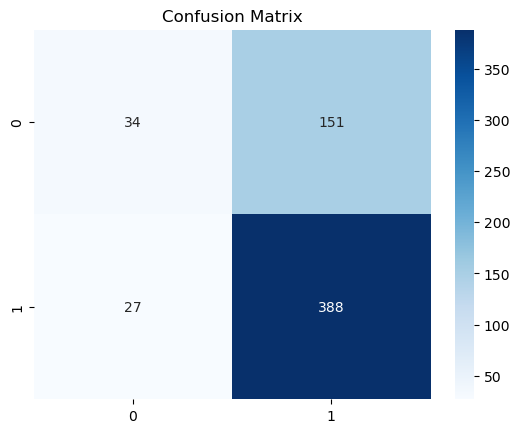

In [20]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

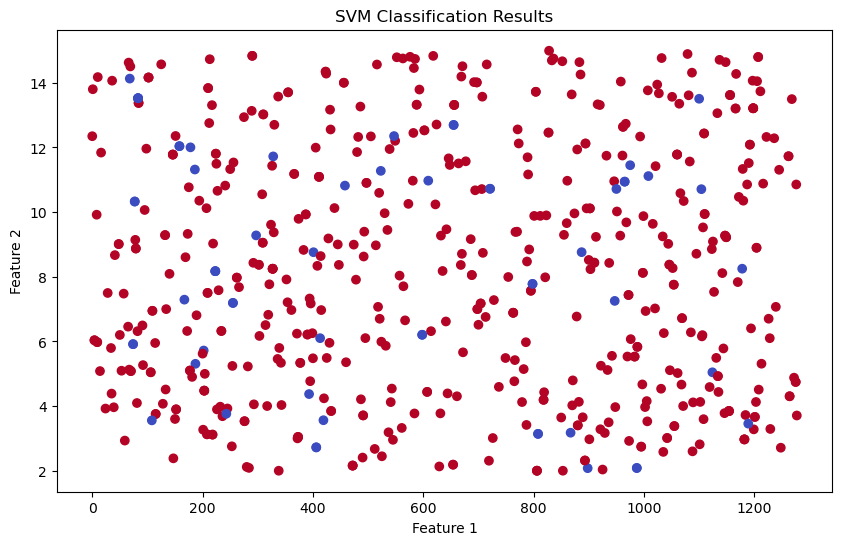

In [21]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=y_pred, cmap="coolwarm", marker="o")
plt.title("SVM Classification Results")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [24]:
# Experiment with different kernels and hyperparameters
svm_model_rbf = SVC(kernel='rbf', C=1, gamma=0.1, random_state=42)
svm_model_rbf.fit(X_train, y_train)
y_pred_rbf = svm_model_rbf.predict(X_test)

accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
classification_rep_rbf = classification_report(y_test, y_pred_rbf)

print(f"RBF Kernel Accuracy: {accuracy_rbf}")
print(classification_rep_rbf)


RBF Kernel Accuracy: 0.8816666666666667
              precision    recall  f1-score   support

           0       1.00      0.62      0.76       185
           1       0.85      1.00      0.92       415

    accuracy                           0.88       600
   macro avg       0.93      0.81      0.84       600
weighted avg       0.90      0.88      0.87       600



In [25]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Initialize SVM models with different kernels
kernels = ['linear', 'poly', 'rbf']
results = {}

for kernel in kernels:
    # Initialize the model
    svm_model = SVC(kernel=kernel, random_state=42)
    # Train the model
    svm_model.fit(X_train, y_train)
    # Predict on the test set
    y_pred = svm_model.predict(X_test)
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    results[kernel] = {'accuracy': accuracy, 'report': report}

# Display the results
for kernel, metrics in results.items():
    print(f"\nKernel: {kernel}")
    print(f"Accuracy: {metrics['accuracy']}")
    print(f"Classification Report: \n{classification_report(y_test, svm_model.predict(X_test))}")


C:\Users\alphabet\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\alphabet\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\alphabet\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", le


Kernel: linear
Accuracy: 0.7033333333333334
Classification Report: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       185
           1       0.69      1.00      0.82       415

    accuracy                           0.69       600
   macro avg       0.35      0.50      0.41       600
weighted avg       0.48      0.69      0.57       600


Kernel: poly
Accuracy: 0.6916666666666667
Classification Report: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       185
           1       0.69      1.00      0.82       415

    accuracy                           0.69       600
   macro avg       0.35      0.50      0.41       600
weighted avg       0.48      0.69      0.57       600


Kernel: rbf
Accuracy: 0.6916666666666667
Classification Report: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       185
           1       0.69      1.00  

C:\Users\alphabet\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\alphabet\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\alphabet\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", le